# Работа с табличными данными

## Задача <a class="anchor" id="second-bullet"></a>

Вы - руководитель звена из четырех групп почти со 100 сотрудниками. <br> Ваши сотрудники прошли обучение на онлайн-платформе, их образовательные успехи переданым вам в виде csv-файла. Нужно свести результаты и получить итоговую оценку успехов сотрудника, т.к. она будет учтена в полугодичном ревью. Задачу мог бы сделать ваш помощник, но вы решили изучить, что проходили ваши сотрудники на платформе, кроме основных курсов, а также самостоятельно разработать систему получения итоговой оценки. 


**Входные файлы**:
- **'group_export_14927_by_course.csv'** - название файла с результатами, выгрузка из онлайн-платформы
Каждая строка - это запись об одном курсе слушателя курса на платформе. 


- **emails.csv** - контактная информация о сотрудниках



**Выходной файл**:
- **results.xlsx** - файл с 4 страницами, в каждом записана информация о сотрудниках подразделения. 

## Pandas - библиотека для работы с табличными данными

 -  <a href="http://pandas.pydata.org/">Pandas</a> - библиотека для обработки и анализа данных. Предназначена для данных разной природы - матричных, панельных данных, временных рядов. Претендует на звание самого мощного и гибкого средства для анализа данных с открытым исходным кодом.


Чтобы использовать (любую) библиотеку, нужно ее подгрузить ее в наш рабочий документ. <br>
Команда устроена так:


**import** название библиотеки 


Для дальнейшего использования название библиотеки могут сократить, но тогда в загрузке указывают ее псевдоним


**import** название библиотеки **as** псевдоним


In [1]:
# загружаем библиотеку
import pandas as pd

### 1. Загрузка и запись данных

- Функции типа **pd.read_формат** и **pd.to_формат**
считывают и записывают данные соответственно. <br /> Полный список можно найти в документации:
http://pandas.pydata.org/pandas-docs/stable/io.html

Я лично перестала пользоваться экселем даже для беглого смотра данных, потому что на моем ноутбуке файлы больше 50Мб представляют сложности для чтения, а я просматриваю гигабайтные файлы. Pandas грузит их в худшем случае минуту-полторы. 

Научимся считывать данные в формате csv (comma separated value) функцией:

- <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv"> pd.read_csv()</a>: 

Аргументов у нее очень много, критически важные:
 - **filepath_or_buffer** - текстовая строка с названием (адресом) файла
 - **sep** - разделитель между данными
 - **header** - номер строки, в которой в файле указаны названия столбцов, None, если нет
 - **names** - список с названиями колонок
 - **index_col** - или номер столбца, или список,  или ничего - колонка, из которой надо взять названия строк


In [2]:
report_bycourse = pd.read_csv('group_export_14927_by_course.csv')

In [3]:
emails = pd.read_csv('emails.csv')

Что из себя представляет **report_bycourse**?

#### Задача 1. 
Изучите, какого типа данные записаны в переменную report_bycourse

**Подсказка**: используйте функцию type

In [4]:
print(type(report_bycourse))
print(type(emails))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


В пандас есть две структуры данных:
- Series: одномерный массив с именованными индексами (чаще всего, данные одного типа)
- DataFrame: двухмерный массив, имеет табличную структуру, легко изменяется по размерам, может содержать в себе данные разных типов

Оба типа можно создавать вручную с помощью функций из самой библиотеки:
- pandas.Series(data=None, index=None, dtype=None)
- pandas.DataFrame(data=None, index=None, columns=None, dtype=None)

- **data** - данные, которые надо записать в структуру
- **index** - индексы строк
- **columns** - названия столбцов
- **dtype** - тип данных

Кроме data, остальные параметры опциональны



Каждая колонка DataFrame - это Series


### 2. Смотрим, что загрузилось

In [5]:
report_bycourse.head()

,FirstName,LastName,Email,Username,Teams,JoinedGroup,LeftGroup,CourseName,Technology,StartedCourse,FinishedCourse,LastVistedCourse,CompletedCourseExercises,CourseCompletionRate,CourseStatus,TotalCourseXPEarned,TotalCourseXPAvailable,XPScore
0,Elizaveta,Valueva,elisa.valua@gmail.com,elisavalua,NaN,09/10/2019,NaN,Introduction to Python,Python,03/14/2018,04/25/2018,04/25/2018,57,1.00,Completed,4700,4700,1.00
1,Elizaveta,Valueva,elisa.valua@gmail.com,elisavalua,NaN,09/10/2019,NaN,Manipulating DataFrames with pandas,Python,09/12/2019,09/12/2019,09/12/2019,75,1.00,Completed,6180,6300,0.98
2,Elizaveta,Valueva,elisa.valua@gmail.com,elisavalua,NaN,09/10/2019,NaN,Merging DataFrames with pandas,Python,09/12/2019,09/14/2019,09/14/2019,56,1.00,Completed,4530,4650,0.97
3,Elizaveta,Valueva,elisa.valua@gmail.com,elisavalua,NaN,09/10/2019,NaN,Foundations of Inference,R,05/11/2018,05/11/2018,05/11/2018,57,0.98,In Progress,4100,4350,0.94
4,Elizaveta,Valueva,elisa.valua@gmail.com,elisavalua,NaN,09/10/2019,NaN,Introduction to Data Visualization with Python,Python,04/11/2018,NaN,04/11/2018,1,0.02,In Progress,50,5000,0.01


#### Задача 2.

Посмотрите, что загрузилось в переменную emails и ее содержимое

In [6]:
emails.head()

,Отметка времени,ФИО,Почта,Группа
0,08.09.2019 21:32:18,Тимлева Полина Евгеньевна,ptimleva@gmail.com,183
1,08.09.2019 21:32:20,Шамалова Анастасия Юрьевна,ayushamalova@edu.hse.ru,184
2,08.09.2019 21:33:41,Галиева Элина Ришатовна,galieva_elinaelina@mail.ru,182
3,08.09.2019 21:34:05,Кобец Алина Иркиновна,kobecalina17@mail.ru,183
4,08.09.2019 21:34:07,Грошева Алёна Олеговна,alena-grosheva2000@yandex.ru,184


### 3. Как объединить две таблицы?

Вы видим, что есть общий ключ - поле Email в таблице report_bycourse и поле Почта в таблице emails. По этому ключу таблицы можно объединить. Эта операция называется **join**; существуют join'ы нескольких видов, лучше всего они иллюстрируются диаграммами Эйлера-Венна.

<img src='https://www.ionos.com/digitalguide/fileadmin/DigitalGuide/Screenshots_2018/Outer-Join.jpg'>

Метод, реализующий объединение таблиц по ключу, доступен в библиотеке pandas и называется pd.merge:

- <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html"> pandas.DataFrame.merge()</a>

Важные параметры метода:
- **right**: таблица, с которой идет объединие, она стоит справа;
- **how**: указывается тип джйона текстом;
- **on**: поле (поля), по которому объединяем, ЕСЛИ поле в обеих таблицах называется одинаково;
- **left on**: поле-ключ (поля) в левой таблице
- **right on**: поле-ключ (поля) в правой таблице

In [7]:
report_bycourse.merge(emails, left_on='Email', right_on='Почта').head()

,FirstName,LastName,Email,Username,Teams,JoinedGroup,LeftGroup,CourseName,Technology,StartedCourse,...,CompletedCourseExercises,CourseCompletionRate,CourseStatus,TotalCourseXPEarned,TotalCourseXPAvailable,XPScore,Отметка времени,ФИО,Почта,Группа
0,Roman,Anapolsky,romanapolsky@gmail.com,RomanAnapolsky,NaN,09/11/2019,NaN,Introduction to Python,Python,09/14/2018,...,57,1.0,Completed,4700,4700,1.00,11.09.2019 11:00:09,Анапольский Роман Михайлович,romanapolsky@gmail.com,181
1,Roman,Anapolsky,romanapolsky@gmail.com,RomanAnapolsky,NaN,09/11/2019,NaN,Intermediate Python for Data Science,Python,09/16/2018,...,87,1.0,Completed,7400,7400,1.00,11.09.2019 11:00:09,Анапольский Роман Михайлович,romanapolsky@gmail.com,181
2,Roman,Anapolsky,romanapolsky@gmail.com,RomanAnapolsky,NaN,09/11/2019,NaN,Importing Data in Python (Part 1),Python,09/19/2018,...,54,1.0,Completed,4150,4150,1.00,11.09.2019 11:00:09,Анапольский Роман Михайлович,romanapolsky@gmail.com,181
3,Roman,Anapolsky,romanapolsky@gmail.com,RomanAnapolsky,NaN,09/11/2019,NaN,Manipulating DataFrames with pandas,Python,09/28/2019,...,75,1.0,Completed,6300,6300,1.00,11.09.2019 11:00:09,Анапольский Роман Михайлович,romanapolsky@gmail.com,181
4,Roman,Anapolsky,romanapolsky@gmail.com,RomanAnapolsky,NaN,09/11/2019,NaN,Merging DataFrames with pandas,Python,09/29/2019,...,56,1.0,Completed,4550,4650,0.98,11.09.2019 11:00:09,Анапольский Роман Михайлович,romanapolsky@gmail.com,181


Результат не сохранен. Мы применили джойн к таблицам и случился джойн типа inner, т.к. это автоматическое значение.
Как узнать, все ли поля из двух таблиц объединятся? Нет ли пропусков по почте?

Или часть сотрудников поленились и не прошли курсы?

### 4. Отбор колонок по названию

У датафреймов, как и любой другой структуры данных, есть поля, в которых хранится информация обо всей таблице. Поля - это не методы и не функции, которые надо применять или вызывать; это записи, к которым можно обратиться за информацией. 

Что делать с датафреймом, можно найти вот <a href="https://pandas.pydata.org/pandas-docs/stable/reference/frame.html"> здесь </a>. Скриншот полей датафрейма:

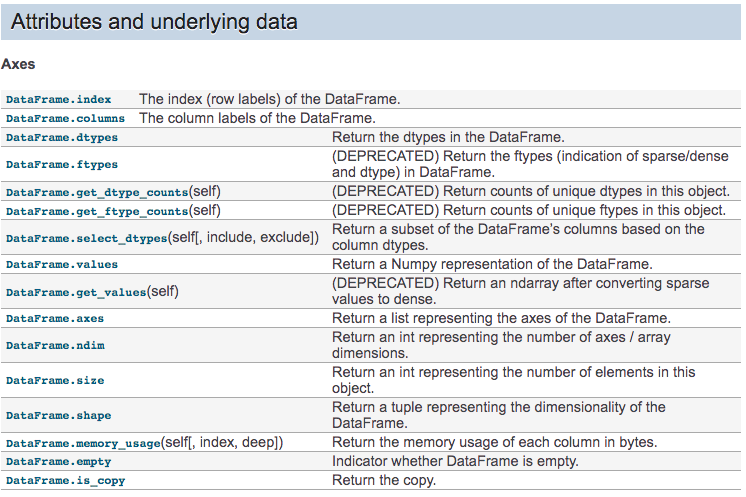

Соответственно, обратившись к полю columns, мы можем узнать, какие поля есть у датафрейма.

In [8]:
emails.columns

Index(['Отметка времени', 'ФИО', 'Почта', 'Группа'], dtype='object')

Чтобы выбрать колонку, достаточно написать следующий код:

In [11]:
emails['Почта']
emails[ ['ФИО', 'Почта']]

,ФИО,Почта
0,Тимлева Полина Евгеньевна,ptimleva@gmail.com
1,Шамалова Анастасия Юрьевна,ayushamalova@edu.hse.ru
2,Галиева Элина Ришатовна,galieva_elinaelina@mail.ru
3,Кобец Алина Иркиновна,kobecalina17@mail.ru
4,Грошева Алёна Олеговна,alena-grosheva2000@yandex.ru
5,Артемьева Алиса Дмитриевна,Alisa.artemyeva@gmail.com
6,Шамалова Анастасия Юрьевна,Ms.shamalova@inbox.ru (ПРЕДЫДУЩАЯ НЕ СЧИТАЕТСЯ)
7,Лебедева Виктория Валерьевна,mashvik95@gmail.com
8,Добошинская Елена Ивановна,lena.doboshinsky@gmail.com
9,Фартунина Александра Валерьевна,FartuninaA15@mail.ru


#### Задача 3.

Посмотрите содержимое колонки Email в датафрейме report_bycourse:

### 5. Удаление дубликатов

Нам надо проверить, все ли почты, указанные в источнике, отразились на платформе.

Мы научились вырезать данные из таблицы.
А как отбросить дубликаты и проверить пересечения между списками?

- <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html"> pandas.DataFrame.drop_duplicates()</a>

In [ ]:
emails['Почта'].drop_duplicates()

#### Задача 4.

Удалите дубликаты в колонке Email из датафрейма report_bycourse:

#### Структура данных множество
- <a href="https://pythontutor.ru/lessons/sets/"> Подробнее о множествах как о структуре данных</a>

Множества как математический объект очень удобны. Для них известны операции:
- пересечения
- объединения
- разность множеств

Они реализованы для структуры данных set в том числе. Если нам нужно найти общее в списках или проверить, какие элементы остались уникальны, то множества очень сильно помогут. 

In [13]:
set(report_bycourse['Email'].drop_duplicates()) - set(emails['Почта'].drop_duplicates())

{'79104351517@yandex.ru',
 'abar77@mail.ru',
 'aezhikharev@edu.hse.ru',
 'alisa.artemyeva@gmail.com',
 'anna_nikas00@mail.ru',
 'annacinderella@yandex.ru',
 'annamarkina98@yandex.ru',
 'arifan2000@mail.ru',
 'arkhipov1226@gmail.com',
 'bavkynovae@icloud.com',
 'brtsv@bk.ru',
 'darkcthulxu@yandex.ru',
 'eksharapova@edu.hse.ru',
 'elentevanyan@gmail.com',
 'elisa.valua@gmail.com',
 'emart09kz@gmail.com',
 'fartuninaa15@mail.ru',
 'jerek1997@mail.ru',
 'kremneva_mary@mail.ru',
 'lenalaz2000@icloud.com',
 'lyna57@mail.ru',
 'manko.tv@yandex.ru',
 'morgunovavl13@gmail.com',
 'mr.philll@mail.ru',
 'ms.shamalova@inbox.ru',
 'mshhechelova@mail.ru',
 'nastya.korovaeva@gmail.com',
 'olgako_2001@mail.ru',
 'pdegorov46@yandex.ru',
 'petechkooo@gmail.com',
 'petrov-dr@mail.ru',
 'plaxophie@mail.ru',
 'plyamovatyydd@mail.ru',
 'retopoev@gmail.com',
 'romanova.anastasia5@yandex.ru',
 'sashavolodina1999@yandex.ru',
 'seashatuash@mail.ru',
 'shanks3373@gmail.com',
 'spain40433@gmail.com',
 'strebkov-se

На платформу могли быть добавлены и люди из других источников.

А если проверить наоборот?

#### Задача 5.

Найдите разность между множествами email['Почта'] и report_bycourse['Email']

In [14]:
set(emails['Почта'].drop_duplicates()) - set(report_bycourse['Email'].drop_duplicates())

{'Advbmm183@gmail.com',
 'Aezhikharev@edu.hse.ru',
 'Alisa.artemyeva@gmail.com',
 'Annacinderella@yandex.ru',
 'Arifan2000@mail.ru',
 'Bavkynovae@icloud.com',
 'DarkCthulxu@yandex.ru',
 'Eksharapova@edu.hse.ru',
 'Elisa.valua@gmail.com',
 'FartuninaA15@mail.ru',
 'Jerek1997@mail.ru',
 'LenaLaz2000@icloud.com',
 'Mr.philll@mail.ru',
 'Ms.shamalova@inbox.ru (ПРЕДЫДУЩАЯ НЕ СЧИТАЕТСЯ)',
 'Olgako_2001@mail.ru',
 'Petrov-dr@mail.ru ',
 'Plaxophie@mail.ru ',
 'Sashavolodina1999@yandex.ru',
 'Student5069@mail.ru ',
 'Talgat0200@gmail.com',
 'Tssmirnov@edu.hse.ru ',
 'Ulya.rybkina@gmail.com ',
 'Zartem2000@gmail.com',
 'aeyakovleva_1@edu.hse.ru',
 'anna_nikas00mail.ru',
 'annamarkina98@yandex. ru',
 'aszolotova@edu.hse.ru',
 'ayushamalova@edu.hse.ru',
 'irrinagor@yandex.ru',
 'jhosuethlambertinz@gmail..com',
 'kremneva_mary@mail.ru ',
 'morgunovavl13@gmail.com ',
 'nimashistov@edu.hse.ru',
 'paklyuchnikova@gmail.com',
 'plyamovatyydd@gmail.com',
 'plyamovatyydd@mail.ru (кажется, ту почту я ввёл

### 6. Обработка столбца email['Почта'] и отбор колонок по индексам

В столбце emails['Почта'] есть проблемы:
- символы с заглавной буквы
- дополнительные записи в строке, которые хорошо бы удалить

In [15]:
emails['Почта']

0                                    ptimleva@gmail.com
1                               ayushamalova@edu.hse.ru
2                            galieva_elinaelina@mail.ru
3                                  kobecalina17@mail.ru
4                          alena-grosheva2000@yandex.ru
5                             Alisa.artemyeva@gmail.com
6       Ms.shamalova@inbox.ru (ПРЕДЫДУЩАЯ НЕ СЧИТАЕТСЯ)
7                                   mashvik95@gmail.com
8                            lena.doboshinsky@gmail.com
9                                  FartuninaA15@mail.ru
10                                   miss_mil.d@mail.ru
11                             borisovakate17@gmail.com
12                                   nik.ek2000@mail.ru
13                                   Petrov-dr@mail.ru 
14                                 nastyk2000@gmail.com
15                                  xusaenov.00@mail.ru
16                                  ek.schubina@mail.ru
17                             Annacinderella@ya

#### Задача 6.

С помощью поля dtypes проверьте, данные какого типа записаны в emails

In [16]:
emails.dtypes

Отметка времени    object
ФИО                object
Почта              object
Группа              int64
dtype: object

Колонка email['Почта'] состоит из текста. А значит, к ней можно применить операции, свойственные строкам.
Нам пригодятся методы:
- **string.lower()**: переводит все в нижний регистр
- **string.len()**: считает длину строки

В питоне реализована очень красивая вещь. Если колонка определенного типа, то к ней можно применить операции, которые свойственны содержащемуся типу данных, достаточно после обращения к колонке указать тип данных:

In [17]:
'собака'.upper()

'СОБАКА'

In [18]:
emails['Почта'].str.lower()

0                                    ptimleva@gmail.com
1                               ayushamalova@edu.hse.ru
2                            galieva_elinaelina@mail.ru
3                                  kobecalina17@mail.ru
4                          alena-grosheva2000@yandex.ru
5                             alisa.artemyeva@gmail.com
6       ms.shamalova@inbox.ru (предыдущая не считается)
7                                   mashvik95@gmail.com
8                            lena.doboshinsky@gmail.com
9                                  fartuninaa15@mail.ru
10                                   miss_mil.d@mail.ru
11                             borisovakate17@gmail.com
12                                   nik.ek2000@mail.ru
13                                   petrov-dr@mail.ru 
14                                 nastyk2000@gmail.com
15                                  xusaenov.00@mail.ru
16                                  ek.schubina@mail.ru
17                             annacinderella@ya

In [19]:
emails['Почта'] = emails['Почта'].str.lower()

Длина строки станет нашим ориентиром, есть ли в колонке лишние записи

In [20]:
emails['Почта'].str.len()

0     18
1     23
2     26
3     20
4     28
5     25
6     47
7     19
8     26
9     20
10    18
11    24
12    18
13    18
14    20
15    19
16    19
17    24
18    19
19    19
20    22
21    17
22    24
23    24
24    19
25    24
26    20
27    22
28    22
29    25
      ..
69    33
70    17
71    18
72    18
73    15
74    17
75    28
76    24
77    22
78    27
79    17
80    24
81    25
82    18
83    21
84    17
85    20
86    21
87    23
88    21
89    27
90    28
91    29
92    22
93    18
94    20
95    22
96    24
97    23
98    60
Name: Почта, Length: 99, dtype: int64

Хорошо бы отсортировать полученные Series
- 
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html"> pandas.DataFrame.sort_values </a>

- **by**: колонка или список колонок, по которому ведется сортировка
- **axis**: 0, если сортируется колонка; 1, если сортируется стркоа
- **ascending**: True/False, убывающая или восходящая сортировка

In [ ]:
emails['Почта'].str.len().sort_values(ascending=False)

Возьмем первые 10 наблюдений:

In [24]:
emails['Почта'].str.len().sort_values(ascending=False)[:10]

98    60
6     47
69    33
57    32
46    31
91    29
4     28
90    28
47    28
75    28
Name: Почта, dtype: int64

И номера строк:

In [25]:
index_list = emails['Почта'].str.len().sort_values(ascending=False)[:10].index
emails['Почта'].str.len().sort_values(ascending=False)[:10].index

Int64Index([98, 6, 69, 57, 46, 91, 4, 90, 47, 75], dtype='int64')

#### Отбор по строкам

Отбирать можно не только по столбцам, но и по строкам.
Для этого существует loc - она смотрит на названия индексов и по ним отбирает

<a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html"> pandas.DataFrame.loс </a>

In [26]:
emails['Почта'].loc[index_list]

98    plyamovatyydd@mail.ru (кажется, ту почту я ввё...
6       ms.shamalova@inbox.ru (предыдущая не считается)
69                    polina.klyuchnikova6627@yandex.ru
57                     plotnikova.anastasia17@gmail.com
46                      vladimir.poliakov.99@gmail.com 
91                        jhosuethlambertinz@gmail..com
4                          alena-grosheva2000@yandex.ru
90                         irresponsiblemoron@gmail.com
47                         bogdaantereschenko@gmail.com
75                         polina925trifonova@gmail.com
Name: Почта, dtype: object

In [28]:
emails['Почта'].loc[98] = 'plyamovatyydd@mail.ru'
emails['Почта'].loc[6] = 'ms.shamalova@inbox.ru'
emails['Почта'].loc[91] = 'jhosuethlambertinz@gmail.com'
emails['Почта'].loc[46] = 'vladimir.poliakov.99@gmail.com'

### Ну все, теперь можно соединять. 

In [29]:
merged_report = report_bycourse.merge(emails, left_on='Email', right_on='Почта')

In [30]:
merged_report.head()

,FirstName,LastName,Email,Username,Teams,JoinedGroup,LeftGroup,CourseName,Technology,StartedCourse,...,CompletedCourseExercises,CourseCompletionRate,CourseStatus,TotalCourseXPEarned,TotalCourseXPAvailable,XPScore,Отметка времени,ФИО,Почта,Группа
0,Elizaveta,Valueva,elisa.valua@gmail.com,elisavalua,NaN,09/10/2019,NaN,Introduction to Python,Python,03/14/2018,...,57,1.00,Completed,4700,4700,1.00,09.09.2019 9:28:12,Валуева Елизавета Михайловна,elisa.valua@gmail.com,183
1,Elizaveta,Valueva,elisa.valua@gmail.com,elisavalua,NaN,09/10/2019,NaN,Manipulating DataFrames with pandas,Python,09/12/2019,...,75,1.00,Completed,6180,6300,0.98,09.09.2019 9:28:12,Валуева Елизавета Михайловна,elisa.valua@gmail.com,183
2,Elizaveta,Valueva,elisa.valua@gmail.com,elisavalua,NaN,09/10/2019,NaN,Merging DataFrames with pandas,Python,09/12/2019,...,56,1.00,Completed,4530,4650,0.97,09.09.2019 9:28:12,Валуева Елизавета Михайловна,elisa.valua@gmail.com,183
3,Elizaveta,Valueva,elisa.valua@gmail.com,elisavalua,NaN,09/10/2019,NaN,Foundations of Inference,R,05/11/2018,...,57,0.98,In Progress,4100,4350,0.94,09.09.2019 9:28:12,Валуева Елизавета Михайловна,elisa.valua@gmail.com,183
4,Elizaveta,Valueva,elisa.valua@gmail.com,elisavalua,NaN,09/10/2019,NaN,Introduction to Data Visualization with Python,Python,04/11/2018,...,1,0.02,In Progress,50,5000,0.01,09.09.2019 9:28:12,Валуева Елизавета Михайловна,elisa.valua@gmail.com,183


### 7. Удаление колонок

Лучший из методов человечества, придуманный для удаления лишних записей.

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html"> pandas.DataFrame.drop() </a>
- **index or labels**: названия строк/столбцов
- **axis**: 1, если смотрим на колонки, 0 - если на строки
- **inplace**: True или False

In [31]:
merged_report.columns

Index(['FirstName', 'LastName', 'Email', 'Username', 'Teams', 'JoinedGroup',
       'LeftGroup', 'CourseName', 'Technology', 'StartedCourse',
       'FinishedCourse', 'LastVistedCourse', 'CompletedCourseExercises',
       'CourseCompletionRate', 'CourseStatus', 'TotalCourseXPEarned',
       'TotalCourseXPAvailable', 'XPScore', 'Отметка времени', 'ФИО', 'Почта',
       'Группа'],
      dtype='object')

In [32]:
merged_report.drop(['FirstName', 'LastName', 'Email'], axis=1, inplace=True)

In [33]:
merged_report.columns

Index(['Username', 'Teams', 'JoinedGroup', 'LeftGroup', 'CourseName',
       'Technology', 'StartedCourse', 'FinishedCourse', 'LastVistedCourse',
       'CompletedCourseExercises', 'CourseCompletionRate', 'CourseStatus',
       'TotalCourseXPEarned', 'TotalCourseXPAvailable', 'XPScore',
       'Отметка времени', 'ФИО', 'Почта', 'Группа'],
      dtype='object')

### 8. Отбор строк по условию

In [35]:
course_list = ['Manipulating DataFrames with pandas', 'Merging DataFrames with pandas', 'Supervised Learning', 'Data Visualization with Seaborn']

#### Вариант 1.

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html"> pandas.DataFrame.isin() </a>

В этот метод обычно отправляем лист искомый значений, которые хотим увидеть в строках. 

In [36]:
merged_report['CourseName'].isin(course_list)

0      False
1       True
2       True
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11      True
12     False
13     False
14     False
15      True
16      True
17     False
18     False
19      True
20     False
21     False
22     False
23     False
24      True
25      True
26     False
27     False
28     False
29      True
       ...  
618    False
619     True
620    False
621    False
622    False
623    False
624    False
625     True
626     True
627    False
628    False
629    False
630    False
631     True
632    False
633    False
634    False
635     True
636     True
637    False
638    False
639     True
640     True
641     True
642    False
643     True
644     True
645     True
646    False
647     True
Name: CourseName, Length: 648, dtype: bool

In [37]:
obligatory_courses_table = merged_report[merged_report['CourseName'].isin(course_list)]
obligatory_courses_table.head()

,Username,Teams,JoinedGroup,LeftGroup,CourseName,Technology,StartedCourse,FinishedCourse,LastVistedCourse,CompletedCourseExercises,CourseCompletionRate,CourseStatus,TotalCourseXPEarned,TotalCourseXPAvailable,XPScore,Отметка времени,ФИО,Почта,Группа
1,elisavalua,NaN,09/10/2019,NaN,Manipulating DataFrames with pandas,Python,09/12/2019,09/12/2019,09/12/2019,75,1.00,Completed,6180,6300,0.98,09.09.2019 9:28:12,Валуева Елизавета Михайловна,elisa.valua@gmail.com,183
2,elisavalua,NaN,09/10/2019,NaN,Merging DataFrames with pandas,Python,09/12/2019,09/14/2019,09/14/2019,56,1.00,Completed,4530,4650,0.97,09.09.2019 9:28:12,Валуева Елизавета Михайловна,elisa.valua@gmail.com,183
11,elisavalua,NaN,09/10/2019,NaN,Data Visualization with Seaborn,Python,09/19/2019,NaN,09/19/2019,38,0.76,In Progress,2290,4200,0.55,09.09.2019 9:28:12,Валуева Елизавета Михайловна,elisa.valua@gmail.com,183
15,RomanAnapolsky,NaN,09/11/2019,NaN,Manipulating DataFrames with pandas,Python,09/28/2019,09/29/2019,09/28/2019,75,1.00,Completed,6300,6300,1.00,11.09.2019 11:00:09,Анапольский Роман Михайлович,romanapolsky@gmail.com,181
16,RomanAnapolsky,NaN,09/11/2019,NaN,Merging DataFrames with pandas,Python,09/29/2019,09/29/2019,09/29/2019,56,1.00,Completed,4550,4650,0.98,11.09.2019 11:00:09,Анапольский Роман Михайлович,romanapolsky@gmail.com,181


#### Вариант 2.

Зачастую нужно всего лишь 1 условие, поэтому отдельно метод isin не нужен - достаточно отобрать строки по условию напрямую

In [40]:
obligatory_courses_table['LastVistedCourse'] <= '09/29/2019'

1      True
2      True
11     True
15     True
16     True
19     True
24     True
25     True
29     True
33     True
34     True
37     True
41     True
42     True
47     True
52     True
53     True
56     True
62     True
63     True
66     True
72     True
73     True
79     True
83     True
84     True
87     True
91     True
92     True
95     True
       ... 
573    True
574    True
576    True
580    True
581    True
584    True
588    True
589    True
592    True
597    True
598    True
601    True
605    True
606    True
610    True
615    True
616    True
619    True
625    True
626    True
631    True
635    True
636    True
639    True
640    True
641    True
643    True
644    True
645    True
647    True
Name: LastVistedCourse, Length: 232, dtype: bool

In [39]:
# дедлайн
obligatory_courses_table = obligatory_courses_table[obligatory_courses_table['LastVistedCourse']<='09/29/2019']
obligatory_courses_table.head()

,Username,Teams,JoinedGroup,LeftGroup,CourseName,Technology,StartedCourse,FinishedCourse,LastVistedCourse,CompletedCourseExercises,CourseCompletionRate,CourseStatus,TotalCourseXPEarned,TotalCourseXPAvailable,XPScore,Отметка времени,ФИО,Почта,Группа
1,elisavalua,NaN,09/10/2019,NaN,Manipulating DataFrames with pandas,Python,09/12/2019,09/12/2019,09/12/2019,75,1.00,Completed,6180,6300,0.98,09.09.2019 9:28:12,Валуева Елизавета Михайловна,elisa.valua@gmail.com,183
2,elisavalua,NaN,09/10/2019,NaN,Merging DataFrames with pandas,Python,09/12/2019,09/14/2019,09/14/2019,56,1.00,Completed,4530,4650,0.97,09.09.2019 9:28:12,Валуева Елизавета Михайловна,elisa.valua@gmail.com,183
11,elisavalua,NaN,09/10/2019,NaN,Data Visualization with Seaborn,Python,09/19/2019,NaN,09/19/2019,38,0.76,In Progress,2290,4200,0.55,09.09.2019 9:28:12,Валуева Елизавета Михайловна,elisa.valua@gmail.com,183
15,RomanAnapolsky,NaN,09/11/2019,NaN,Manipulating DataFrames with pandas,Python,09/28/2019,09/29/2019,09/28/2019,75,1.00,Completed,6300,6300,1.00,11.09.2019 11:00:09,Анапольский Роман Михайлович,romanapolsky@gmail.com,181
16,RomanAnapolsky,NaN,09/11/2019,NaN,Merging DataFrames with pandas,Python,09/29/2019,09/29/2019,09/29/2019,56,1.00,Completed,4550,4650,0.98,11.09.2019 11:00:09,Анапольский Роман Михайлович,romanapolsky@gmail.com,181


In [41]:
# посмотрим на колонки
obligatory_courses_table.columns

Index(['Username', 'Teams', 'JoinedGroup', 'LeftGroup', 'CourseName',
       'Technology', 'StartedCourse', 'FinishedCourse', 'LastVistedCourse',
       'CompletedCourseExercises', 'CourseCompletionRate', 'CourseStatus',
       'TotalCourseXPEarned', 'TotalCourseXPAvailable', 'XPScore',
       'Отметка времени', 'ФИО', 'Почта', 'Группа'],
      dtype='object')

In [42]:
cols = ['CompletedCourseExercises', 'XPScore', 'ФИО', 'Почта', 'Группа']

#### Задание

Оставьте в датафрейме только те колонки, которые перечислены в листе cols

In [43]:
obligatory_courses_table = obligatory_courses_table[cols]
obligatory_courses_table.head()

,CompletedCourseExercises,XPScore,ФИО,Почта,Группа
1,75,0.98,Валуева Елизавета Михайловна,elisa.valua@gmail.com,183
2,56,0.97,Валуева Елизавета Михайловна,elisa.valua@gmail.com,183
11,38,0.55,Валуева Елизавета Михайловна,elisa.valua@gmail.com,183
15,75,1.00,Анапольский Роман Михайлович,romanapolsky@gmail.com,181
16,56,0.98,Анапольский Роман Михайлович,romanapolsky@gmail.com,181


### 9. Переименовывание колонок

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html"> pandas.DataFrame.rename() </a>
- **columns**: переименование колонок
- **index**: переименование строк

In [45]:
obligatory_courses_table = obligatory_courses_table.rename(columns={
    'ФИО':'name', 'Почта':'email', 'Группа':'group',
    'CompletedCourseExercises': 'completed_course_exercises',
    'XPScore':'xp_score'})

In [46]:
obligatory_courses_table = obligatory_courses_table[obligatory_courses_table['xp_score'] != 0]

### 10. Группировка данных

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html"> pandas.DataFrame.groupby() </a>

- **by**: колонка или набор колонок, по которым проводится агрегация

Сам по себе метод выдает сгруппированные объекты.
Далее обязательно нужно задать агрегирующую операцию - т.е. что для найденной группы посчитать. Количество? Сумму? Среднее?

In [47]:
students_score = (obligatory_courses_table
                  .groupby(['name', 'group'])['completed_course_exercises']
                  .sum())

In [48]:
students_score.head()

name                            group
Анапольский Роман Михайлович    181      181
Артемьева Алиса Дмитриевна      181      168
Бавкунова Элина Евгеньевна      184      168
Борисова Екатерина Алексеевна   182      181
Валуева Елизавета Михайловна    183      169
Name: completed_course_exercises, dtype: int64

Чтобы таблица стала таблицей, а не колонкой, можно применить метод reset_index()

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html"> pandas.DataFrame.reset_index() </a>

In [49]:
students_score = students_score.reset_index()

In [50]:
students_score

,name,group,completed_course_exercises
0,Анапольский Роман Михайлович,181,181
1,Артемьева Алиса Дмитриевна,181,168
2,Бавкунова Элина Евгеньевна,184,168
3,Борисова Екатерина Алексеевна,182,181
4,Валуева Елизавета Михайловна,183,169
5,Володина Александра Кирилловна,184,168
6,Галиева Элина Ришатовна,182,180
7,Гаспарян Генрих Рубенович,181,136
8,Гиносян Диана Степановна,183,168
9,Гладун Данил Михайлович,184,168


### 11. Описательные статистики


<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html"> pandas.DataFrame.describe() </a>

In [51]:
students_score['completed_course_exercises'].describe()

count     78.000000
mean     168.410256
std       14.565959
min       75.000000
25%      168.000000
50%      168.000000
75%      178.000000
max      181.000000
Name: completed_course_exercises, dtype: float64

Аналогично, можно посчитать отдельные метрики одноименными функциями:<br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html"> pandas.DataFrame.mean() </a> <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html"> pandas.DataFrame.min() </a> <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html"> pandas.DataFrame.max() </a> <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html"> pandas.DataFrame.std() </a> <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html"> pandas.DataFrame.median() </a> <br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quartile.html"> pandas.DataFrame.quantile(q=share) </a> <br>

### 12. Определение порогов

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html"> pandas.cut() </a>
- **x**: массив данных
- **bins**: дискретные интервалы
- **labels**: новые значения

In [52]:
labels = list(range(1, 11))

In [53]:
labels

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#### Задание

В цикле создайте лист bins, в котором итеративно добавите грани для получения оценок от 1 до 10. 

In [58]:
bins = [0]
step = ((students_score['completed_course_exercises'].max() 
        - students_score['completed_course_exercises'].min()) / 10)
min_score = students_score['completed_course_exercises'].min()
max_score = students_score['completed_course_exercises'].max()
for i in range(9):
    bins.append(i*step + min_score)
bins.append(max_score + 1)
print(bins)

[0, 75.0, 85.6, 96.2, 106.8, 117.4, 128.0, 138.6, 149.2, 159.8, 182]


In [59]:
students_score['grade'] = pd.cut(students_score['completed_course_exercises'], 
                                 bins=bins, labels=labels)

In [61]:
students_score.head()

,name,group,completed_course_exercises,grade
0,Анапольский Роман Михайлович,181,181,10
1,Артемьева Алиса Дмитриевна,181,168,10
2,Бавкунова Элина Евгеньевна,184,168,10
3,Борисова Екатерина Алексеевна,182,181,10
4,Валуева Елизавета Михайловна,183,169,10


### 13. Распределение оценок

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html"> pandas.DataFrame.value_counts() </a>

In [62]:
students_score['grade'].value_counts()

10    72
8      3
7      2
1      1
9      0
6      0
5      0
4      0
3      0
2      0
Name: grade, dtype: int64

In [63]:
students_score.to_csv('results.csv')
students_score.to_excel('results.xlsx')


### 14. Запись в файл

#### Задание:

- Переименуйте колонки таблицы emails так, чтобы ФИО стало name, а группа - group <br> 
- Объедините левым соединением emails и students_score по набору ключей [name, group] <br> 
- Заполните пропуски в оценках методом <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html"> pandas.DataFrame.fillna() </a>

In [64]:
students_score

,name,group,completed_course_exercises,grade
0,Анапольский Роман Михайлович,181,181,10
1,Артемьева Алиса Дмитриевна,181,168,10
2,Бавкунова Элина Евгеньевна,184,168,10
3,Борисова Екатерина Алексеевна,182,181,10
4,Валуева Елизавета Михайловна,183,169,10
5,Володина Александра Кирилловна,184,168,10
6,Галиева Элина Ришатовна,182,180,10
7,Гаспарян Генрих Рубенович,181,136,7
8,Гиносян Диана Степановна,183,168,10
9,Гладун Данил Михайлович,184,168,10


#### Задание

Создайте 4 датафрейма, в каждом из которых соберите информацию только об участниках одной группы. 

In [66]:
df1 = students_score[students_score['group'] == 181]
df2 = students_score[students_score['group'] == 182]
df3 = students_score[students_score['group'] == 183]
df4 = students_score[students_score['group'] == 184]

<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html"> pandas.DataFrame.to_excel()

In [67]:
with pd.ExcelWriter('Результаты.xlsx') as writer:  

    df1.to_excel(writer, sheet_name='181')
    df2.to_excel(writer, sheet_name='182')
    df3.to_excel(writer, sheet_name='183')
    df4.to_excel(writer, sheet_name='184')

In [68]:
with pd.ExcelWriter('Результаты_2.xlsx') as writer:  
    for groupnum in [181, 182, 183, 184]:
        (students_score[students_score['group'] == groupnum]
         .to_excel(writer, sheet_name=str(groupnum)))